In [1]:
%cd ..
%load_ext nb_black

/home/hardianlawi/attention-lstm-sentiment-analysis


<IPython.core.display.Javascript object>

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['legend.frameon'] = True
sns.set_style("whitegrid", {'grid.linestyle': '--'})


<IPython.core.display.Javascript object>

In [3]:
def _read_json(path):
    with open(path, "r") as f:
        return json.load(f)


def _average_perfs(model_type):
    perfs = []
    for i in range(3):
        perf = _read_json(f"{model_type}_perfs_{i}.json")
        if perfs:
            assert perf["hparams"] == perfs[-1]["hparams"]
            assert perf["num_params"] == perfs[-1]["num_params"]
        perfs.append(perf)
    perfs = {
        "hparams": perfs[0]["hparams"],
        "num_params": perfs[0]["num_params"],
        "accs": np.mean(np.vstack([np.array(x["accs"]) for x in perfs]), axis=0),
    }
    return perfs


attention_perfs = _average_perfs("attention")
lstm_perfs = _average_perfs("lstm")

<IPython.core.display.Javascript object>

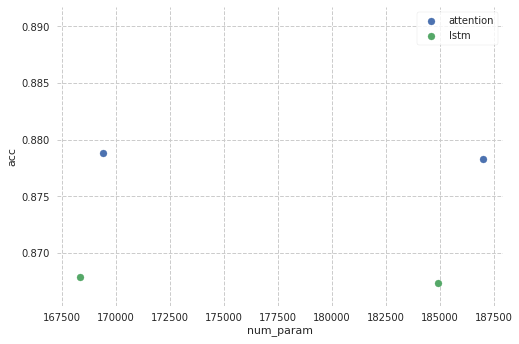

<IPython.core.display.Javascript object>

In [4]:
plt.scatter(attention_perfs["num_params"], attention_perfs["accs"])
plt.scatter(lstm_perfs["num_params"], lstm_perfs["accs"])
plt.xlabel("num_param")
plt.ylabel("acc")
plt.legend(["attention", "lstm"])
plt.show()